In [1]:
#Здесь представлено решение, знаметитой задачи Титаник.
#Датасет Титаник содержит данные пассажиров корабля. 
#Цель задачи — построить модель, которая лучшим образом сможет предсказать, остался ли произвольный пассажир в живых или нет.

In [ ]:
from sklearn import tree
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [25]:
titanic_data=pd.read_csv('train.csv')

In [26]:
titanic_test=pd.read_csv('test.csv')

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
titanic_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


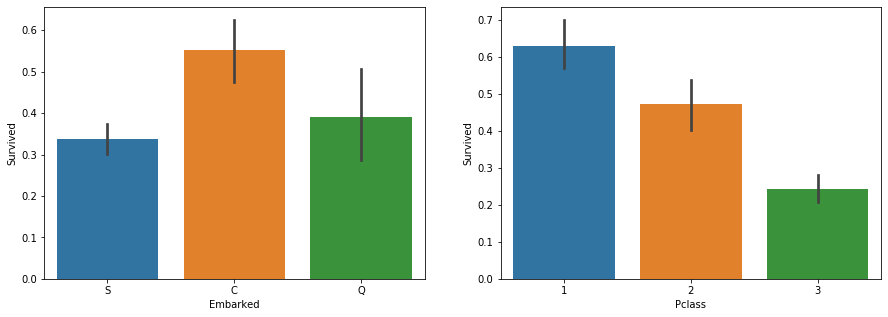

In [28]:
# Survived в зависимости от Embarked и Pclass
fig,ax=plt.subplots(1, 2,figsize=(15,5))
sns.barplot(x='Embarked',y='Survived',data=titanic_data,ax=ax[0])
sns.barplot(x='Pclass',y='Survived',order=[1,2,3],data=titanic_data,ax=ax[1])


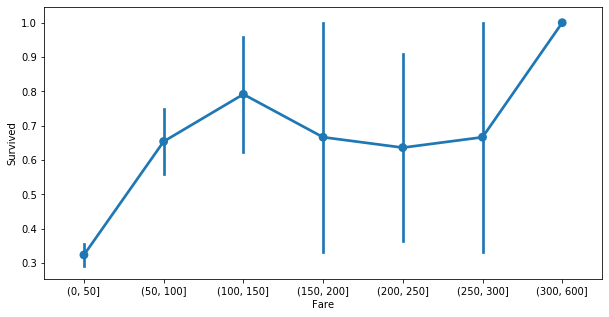

In [32]:
# Survived в зависимости от цены билета
df=titanic_data.copy()
df['Fare'] = pd.cut(df['Fare'], bins=[0, 50, 100, 150, 200, 250, 300,600])
plt.figure(figsize=(10,5))
sns.pointplot(x='Fare',y='Survived', data=df)

C:\Users\papa\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\papa\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


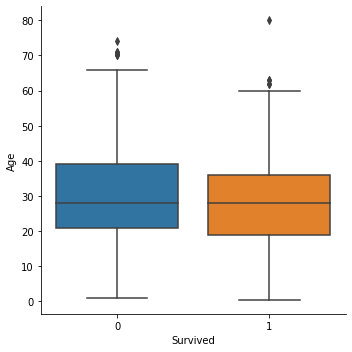

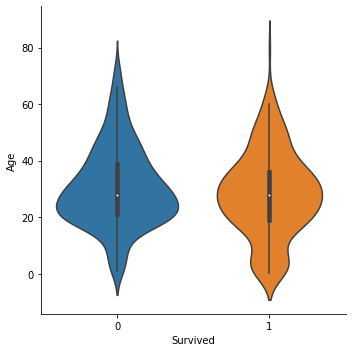

In [9]:
# боксплот для Survived в зависимости возраста пассажиров 
sns.factorplot(x="Survived", y = "Age",data = titanic_data, kind="box")
sns.factorplot(x="Survived", y = "Age",data = titanic_data, kind="violin")

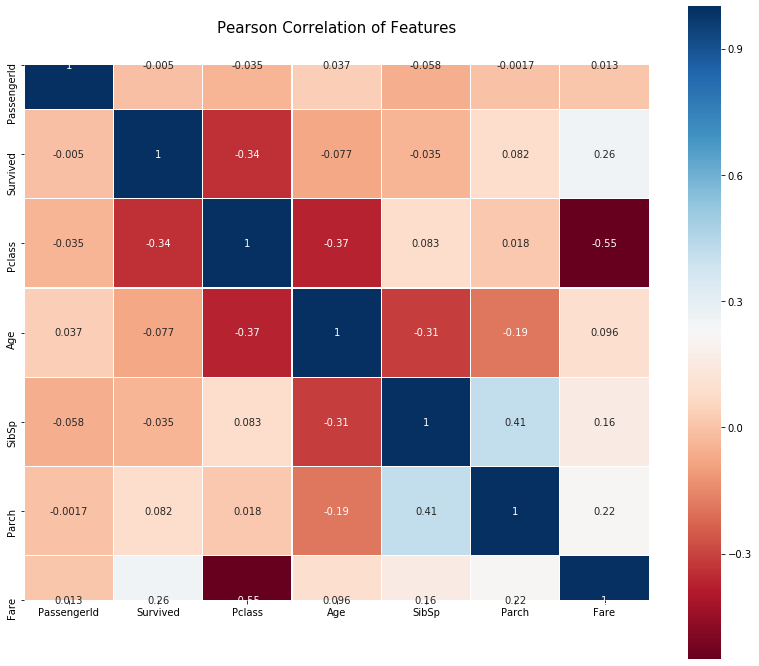

In [33]:
# Корреляция
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(titanic_data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

C:\Users\papa\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\papa\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\papa\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


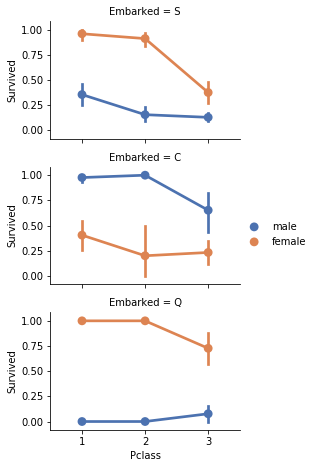

In [34]:
grid = sns.FacetGrid(titanic_data, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [7]:
# далее создание конвеера для численных данных

In [8]:
# Создание трансформатора для заполнения пропущеных значений медианными значениями внутри группы('Pclass','Sex')
class MyImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X):
        return self
    def transform(self, X):
        gr=titanic_data.groupby(['Pclass','Sex'])
        X['Age']=gr.Age.apply(lambda x: x.fillna(x.median()))
        X['Fare']=gr.Fare.apply(lambda x: x.fillna(x.median()))
        return X

In [10]:
# Создание трансформатора для отбора определенных признаков
class DataFrameSelectorNum(BaseEstimator, TransformerMixin):
    def __init__(self, attr_names):
        self.attr_names=attr_names
    def fit(self, X):
        return self
    def transform(self, X):
        return X[self.attr_names]

In [11]:
from sklearn.pipeline import Pipeline

In [12]:
#конвеер для числовых атрибутов
list_num=['Pclass','Age','SibSp','Parch','Fare']
num_pipeline=Pipeline([('selector',DataFrameSelectorNum(list_num)),('median', MyImputer()),('scale',MinMaxScaler())])
# scale можно менять на мин макс или стандартизацию

In [196]:
# далее создание конвеера для категориальных данных

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion

In [16]:
list_cat=['Embarked','Sex']
cat_pipeline=Pipeline([('selector',DataFrameSelectorNum(list_cat)),\
                       ('moda', SimpleImputer(strategy='most_frequent')),\
                       ('encod',OneHotEncoder(sparse=False,drop='first'))])

In [15]:
#Объеденение двух конвееров
full_pipeline=FeatureUnion(transformer_list=[('num',num_pipeline),('cat',cat_pipeline)])

In [16]:
X_train=full_pipeline.fit_transform(titanic_data)
y_train=titanic_data['Survived']

C:\Users\papa\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\papa\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [18]:
X_test=full_pipeline.fit_transform(titanic_test)
X_test

C:\Users\papa\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\papa\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


array([[1.        , 0.30169588, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.52971355, 0.125     , ..., 0.        , 1.        ,
        0.        ],
       [0.5       , 0.3587003 , 0.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.29457033, 0.        , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 0.47270913, 0.        , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 0.24469146, 0.125     , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
#Выбор моделей для предсказания 
#Так как данных не так много будем использовать проверку на кроссвалидации

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [292]:
rf_clf=RandomForestClassifier()

In [296]:
parametrs={'n_estimators':range(5,20,5), 'max_depth':range(5,12,2),'min_samples_leaf':range(1,9,2), 'min_samples_split':range(2,30,4)}

In [ ]:
#Сразу найдем лучшие параметры для RandomForestClassifier

In [297]:
grid=GridSearchCV(rf_clf,parametrs,cv=StratifiedKFold(n_splits=4))

In [298]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(5, 12, 2),
                         'min_samples_leaf': range(1, 9, 2),
                         'min_samples_split': range(2, 30, 4),
                         'n_estimators': range(5, 20, 5)})

In [300]:
best_rf=grid.best_estimator_
best_rf

RandomForestClassifier(max_depth=9, min_samples_split=14, n_estimators=15)

In [301]:
cross_val_score(best_rf, X_train, y_train, cv=5).mean()

0.8327851358985626

In [303]:
best_rf.feature_importances_

array([0.11152562, 0.13799173, 0.0511989 , 0.03934529, 0.21147706,
       0.0117053 , 0.02156683, 0.41518925])

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logreg = LogisticRegression(C=1)

In [357]:
parametrs={'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'penalty':['l1', 'l2', 'elasticnet']}

In [358]:
grid=GridSearchCV(logreg,parametrs,cv=StratifiedKFold(n_splits=4))

In [359]:
grid.fit(X_train,y_train)

C:\Users\papa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\papa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\papa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\papa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\papa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=LogisticRegression(C=1),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [360]:
best_log=grid.best_estimator_
best_log

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [361]:
cross_val_score(best_log, X_train, y_train, cv=5).mean()

0.8013684012303057

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knnclf = KNeighborsClassifier(n_neighbors=13)

In [21]:
cross_val_score(knnclf, X_train, y_train, cv=5).mean()

0.8114556525014123

In [22]:
from sklearn.svm import LinearSVC

In [23]:
svmclf = LinearSVC()

In [24]:
cross_val_score(svmclf, X_train, y_train, cv=5).mean()

C:\Users\papa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\papa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\papa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\papa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\papa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

0.7935032326909799

In [23]:
from sklearn.svm import SVC

In [434]:
svcclf = SVC(gamma=0.14)

In [435]:
cross_val_score(svcclf, X_train, y_train, cv=5).mean()

0.8249136902893728

In [114]:
from sklearn.ensemble import GradientBoostingClassifier

In [117]:
clf=GradientBoostingClassifier(n_estimators=158)

In [118]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.8305504990270542

In [120]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=158)

In [121]:
y_pred=clf.predict(X_test)


In [44]:
parametrs={'n_estimators':range(120,180,20),'criterion':['friedman_mse','mae']}
grid=GridSearchCV(clf,parametrs,cv=StratifiedKFold(n_splits=5))

In [45]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'n_estimators': range(120, 180, 20)})

In [46]:
best_log=grid.best_estimator_
best_log

GradientBoostingClassifier(n_estimators=140)

In [47]:
cross_val_score(best_log, X_train, y_train, cv=5).mean()

0.8305504990270542

In [ ]:
# Использование ансамблевых методов

In [25]:
from sklearn.ensemble import VotingClassifier

In [27]:
reg1 = KNeighborsClassifier(n_neighbors=13)
reg2 = LogisticRegression(C=1)
reg3 = GradientBoostingClassifier(n_estimators=158)
#SVC(gamma=0.14)

ereg = VotingClassifier(estimators=[('rf', reg1), ('lr', reg2), ('Gb',reg3)],voting='soft')
cross_val_score(ereg, X_train, y_train, cv=5).mean()

0.8282970309459545

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [31]:
ada_clf=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=80)

In [32]:
cross_val_score(ada_clf, X_train, y_train, cv=5).mean()

0.8215931203314293

In [49]:
from sklearn.ensemble import StackingClassifier

In [ ]:
('svc', SVC(gamma=0.14))

In [61]:
estimators = [
             ('knn', KNeighborsClassifier(n_neighbors=13)),
             ('log', GradientBoostingClassifier(n_estimators=140))]

In [62]:
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(C=1))

In [63]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=13)),
                               ('log',
                                GradientBoostingClassifier(n_estimators=140))],
                   final_estimator=LogisticRegression(C=1))

In [64]:
clf.score(X_train, y_train)

0.8978675645342312

In [65]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.8339024543343168

In [107]:
y_predict=clf.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,

In [126]:
titanic_submissions=pd.DataFrame({'PassengerId':titanic_test['PassengerId'],'Survived':y_pred})

In [127]:
titanic_submissions.set_index('PassengerId', inplace=True)

In [129]:
titanic_submissions.to_csv('titanic_submissions_GBC.csv')

In [ ]:
# Нейронная сеть на основе keras

In [22]:
import keras
from keras import models
from keras import layers
from keras import optimizers
from sklearn.model_selection import StratifiedShuffleSplit

Using TensorFlow backend.


In [23]:
X_train.shape

(891, 8)

In [24]:
# Разобьем датасет на обучающие и тестовые данные с использованием StratifiedShuffleSplit  
skf = StratifiedShuffleSplit(n_splits=1,test_size=0.3)
for train_index, test_index in skf.split(X_train, y_train):
    X_train_train, X_train_test = X_train[train_index], X_train[test_index]
    y_train_train, y_train_test = y_train[train_index], y_train[test_index]

In [353]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model=models.Sequential()
model.add(layers.Dense(6, activation='relu',\
              kernel_regularizer=keras.regularizers.l2(0.01),input_shape=(8,)))
model.add(layers.Dense(6, activation='relu',\
              kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [354]:
history = model.fit(X_train_train,
                    y_train_train,
                    epochs=400,
                    batch_size=891,
                    validation_data=(X_train_test, y_train_test))

Train on 623 samples, validate on 268 samples
Epoch 1/400
623/623 [==============================] - 1s 2ms/step - loss: 0.8077 - accuracy: 0.6116 - val_loss: 0.7984 - val_accuracy: 0.6157
Epoch 2/400
623/623 [==============================] - 0s 16us/step - loss: 0.7934 - accuracy: 0.6164 - val_loss: 0.7815 - val_accuracy: 0.6157
Epoch 3/400
623/623 [==============================] - 0s 10us/step - loss: 0.7770 - accuracy: 0.6164 - val_loss: 0.7647 - val_accuracy: 0.6157
Epoch 4/400
623/623 [==============================] - 0s 10us/step - loss: 0.7604 - accuracy: 0.6164 - val_loss: 0.7487 - val_accuracy: 0.6157
Epoch 5/400
623/623 [==============================] - 0s 11us/step - loss: 0.7442 - accuracy: 0.6164 - val_loss: 0.7350 - val_accuracy: 0.6157
Epoch 6/400
623/623 [==============================] - 0s 10us/step - loss: 0.7298 - accuracy: 0.6164 - val_loss: 0.7228 - val_accuracy: 0.6157
Epoch 7/400
623/623 [==============================] - 0s 10us/step - loss: 0.7175 - accura

Epoch 58/400
623/623 [==============================] - 0s 11us/step - loss: 0.4798 - accuracy: 0.8234 - val_loss: 0.4815 - val_accuracy: 0.8246
Epoch 59/400
623/623 [==============================] - 0s 11us/step - loss: 0.4792 - accuracy: 0.8218 - val_loss: 0.4815 - val_accuracy: 0.8246
Epoch 60/400
623/623 [==============================] - 0s 10us/step - loss: 0.4786 - accuracy: 0.8218 - val_loss: 0.4815 - val_accuracy: 0.8246
Epoch 61/400
623/623 [==============================] - 0s 13us/step - loss: 0.4780 - accuracy: 0.8218 - val_loss: 0.4812 - val_accuracy: 0.8284
Epoch 62/400
623/623 [==============================] - 0s 10us/step - loss: 0.4775 - accuracy: 0.8218 - val_loss: 0.4807 - val_accuracy: 0.8284
Epoch 63/400
623/623 [==============================] - 0s 8us/step - loss: 0.4770 - accuracy: 0.8218 - val_loss: 0.4802 - val_accuracy: 0.8246
Epoch 64/400
623/623 [==============================] - 0s 16us/step - loss: 0.4766 - accuracy: 0.8218 - val_loss: 0.4798 - val_acc

Epoch 115/400
623/623 [==============================] - 0s 13us/step - loss: 0.4652 - accuracy: 0.8186 - val_loss: 0.4690 - val_accuracy: 0.8246
Epoch 116/400
623/623 [==============================] - 0s 10us/step - loss: 0.4650 - accuracy: 0.8202 - val_loss: 0.4689 - val_accuracy: 0.8246
Epoch 117/400
623/623 [==============================] - 0s 14us/step - loss: 0.4649 - accuracy: 0.8202 - val_loss: 0.4689 - val_accuracy: 0.8246
Epoch 118/400
623/623 [==============================] - 0s 11us/step - loss: 0.4648 - accuracy: 0.8202 - val_loss: 0.4688 - val_accuracy: 0.8246
Epoch 119/400
623/623 [==============================] - 0s 11us/step - loss: 0.4647 - accuracy: 0.8202 - val_loss: 0.4688 - val_accuracy: 0.8246
Epoch 120/400
623/623 [==============================] - 0s 10us/step - loss: 0.4646 - accuracy: 0.8202 - val_loss: 0.4688 - val_accuracy: 0.8246
Epoch 121/400
623/623 [==============================] - 0s 18us/step - loss: 0.4645 - accuracy: 0.8202 - val_loss: 0.4687 -

Epoch 172/400
623/623 [==============================] - 0s 10us/step - loss: 0.4599 - accuracy: 0.8202 - val_loss: 0.4653 - val_accuracy: 0.8284
Epoch 173/400
623/623 [==============================] - 0s 8us/step - loss: 0.4598 - accuracy: 0.8202 - val_loss: 0.4653 - val_accuracy: 0.8284
Epoch 174/400
623/623 [==============================] - 0s 13us/step - loss: 0.4597 - accuracy: 0.8202 - val_loss: 0.4652 - val_accuracy: 0.8284
Epoch 175/400
623/623 [==============================] - 0s 8us/step - loss: 0.4596 - accuracy: 0.8202 - val_loss: 0.4651 - val_accuracy: 0.8284
Epoch 176/400
623/623 [==============================] - 0s 10us/step - loss: 0.4596 - accuracy: 0.8202 - val_loss: 0.4651 - val_accuracy: 0.8246
Epoch 177/400
623/623 [==============================] - 0s 10us/step - loss: 0.4595 - accuracy: 0.8202 - val_loss: 0.4651 - val_accuracy: 0.8284
Epoch 178/400
623/623 [==============================] - 0s 10us/step - loss: 0.4594 - accuracy: 0.8202 - val_loss: 0.4650 - v

Epoch 229/400
623/623 [==============================] - 0s 8us/step - loss: 0.4565 - accuracy: 0.8186 - val_loss: 0.4631 - val_accuracy: 0.8284
Epoch 230/400
623/623 [==============================] - 0s 8us/step - loss: 0.4565 - accuracy: 0.8170 - val_loss: 0.4631 - val_accuracy: 0.8284
Epoch 231/400
623/623 [==============================] - 0s 13us/step - loss: 0.4564 - accuracy: 0.8170 - val_loss: 0.4631 - val_accuracy: 0.8321
Epoch 232/400
623/623 [==============================] - 0s 13us/step - loss: 0.4564 - accuracy: 0.8170 - val_loss: 0.4632 - val_accuracy: 0.8321
Epoch 233/400
623/623 [==============================] - 0s 10us/step - loss: 0.4563 - accuracy: 0.8170 - val_loss: 0.4631 - val_accuracy: 0.8284
Epoch 234/400
623/623 [==============================] - 0s 14us/step - loss: 0.4563 - accuracy: 0.8170 - val_loss: 0.4630 - val_accuracy: 0.8284
Epoch 235/400
623/623 [==============================] - 0s 11us/step - loss: 0.4562 - accuracy: 0.8186 - val_loss: 0.4630 - v

Epoch 286/400
623/623 [==============================] - 0s 11us/step - loss: 0.4540 - accuracy: 0.8170 - val_loss: 0.4617 - val_accuracy: 0.8321
Epoch 287/400
623/623 [==============================] - 0s 8us/step - loss: 0.4539 - accuracy: 0.8170 - val_loss: 0.4617 - val_accuracy: 0.8321
Epoch 288/400
623/623 [==============================] - 0s 11us/step - loss: 0.4539 - accuracy: 0.8170 - val_loss: 0.4616 - val_accuracy: 0.8321
Epoch 289/400
623/623 [==============================] - 0s 10us/step - loss: 0.4539 - accuracy: 0.8170 - val_loss: 0.4616 - val_accuracy: 0.8321
Epoch 290/400
623/623 [==============================] - 0s 11us/step - loss: 0.4538 - accuracy: 0.8170 - val_loss: 0.4616 - val_accuracy: 0.8321
Epoch 291/400
623/623 [==============================] - 0s 8us/step - loss: 0.4538 - accuracy: 0.8170 - val_loss: 0.4615 - val_accuracy: 0.8321
Epoch 292/400
623/623 [==============================] - 0s 10us/step - loss: 0.4538 - accuracy: 0.8170 - val_loss: 0.4616 - v

Epoch 343/400
623/623 [==============================] - 0s 8us/step - loss: 0.4519 - accuracy: 0.8154 - val_loss: 0.4607 - val_accuracy: 0.8321
Epoch 344/400
623/623 [==============================] - 0s 10us/step - loss: 0.4518 - accuracy: 0.8154 - val_loss: 0.4606 - val_accuracy: 0.8358
Epoch 345/400
623/623 [==============================] - 0s 8us/step - loss: 0.4518 - accuracy: 0.8154 - val_loss: 0.4605 - val_accuracy: 0.8358
Epoch 346/400
623/623 [==============================] - 0s 8us/step - loss: 0.4518 - accuracy: 0.8154 - val_loss: 0.4603 - val_accuracy: 0.8321
Epoch 347/400
623/623 [==============================] - 0s 8us/step - loss: 0.4517 - accuracy: 0.8154 - val_loss: 0.4602 - val_accuracy: 0.8358
Epoch 348/400
623/623 [==============================] - 0s 10us/step - loss: 0.4517 - accuracy: 0.8154 - val_loss: 0.4601 - val_accuracy: 0.8321
Epoch 349/400
623/623 [==============================] - 0s 8us/step - loss: 0.4517 - accuracy: 0.8154 - val_loss: 0.4601 - val_

Epoch 400/400
623/623 [==============================] - 0s 8us/step - loss: 0.4501 - accuracy: 0.8170 - val_loss: 0.4596 - val_accuracy: 0.8358


In [225]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

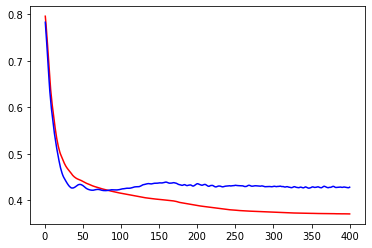

In [321]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'b',color='r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

In [ ]:
# После многочисленных изменений пареметров нейронной сети пришел к выводу, что итоговые характеристики являются лучшими

In [351]:
model.weights

[<tf.Variable 'dense_212/kernel:0' shape=(8, 6) dtype=float32, numpy=
 array([[-3.89370143e-01, -8.90362159e-11,  2.76362985e-01,
          4.24517579e-02, -4.97606734e-10, -2.51560301e-01],
        [ 1.59829050e-01, -1.45983919e-13,  6.63688362e-01,
          1.10918365e-01, -1.56935812e-10,  1.55879632e-01],
        [-5.74589223e-02,  1.04675608e-11,  2.81060845e-01,
          4.84636277e-02, -1.13097559e-10, -6.52770326e-02],
        [-2.21020475e-01,  1.34587914e-11, -1.45880267e-01,
         -2.37383973e-02,  1.97315775e-11, -2.24182606e-01],
        [-2.77371276e-02,  1.34922476e-10,  9.29888524e-03,
          1.67600950e-03, -1.12131082e-10,  1.09845400e-02],
        [ 1.40509784e-01,  2.33417008e-10,  2.05757499e-01,
          3.42325121e-02, -2.16891560e-10,  7.07365423e-02],
        [ 1.25166640e-01,  3.02920328e-11,  1.72860265e-01,
          2.76510362e-02, -1.51993321e-10, -1.71076506e-02],
        [-3.90444785e-01, -2.52746268e-10,  2.36536995e-01,
          3.60395536e-0

In [352]:
model.summary()

Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_212 (Dense)            (None, 6)                 54        
_________________________________________________________________
dense_213 (Dense)            (None, 6)                 42        
_________________________________________________________________
dense_214 (Dense)            (None, 1)                 7         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [348]:
predict1=model.predict(X_test)
predict=np.where(predict1>=0.5,1,0)
predict=predict.reshape(418,)

In [349]:
titanic_submissions=pd.DataFrame({'PassengerId':titanic_test['PassengerId'],'Survived':predict})
titanic_submissions.set_index('PassengerId', inplace=True)

In [350]:
titanic_submissions.to_csv('titanic_submissions_neural_l2.csv')